In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download(["stopwords","wordnet"])
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#Data Preporcessing 

In [2]:
data=pd.read_csv("SpamCollectionSMS.txt",sep="\t",names=["label","text"])

In [3]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
data.isnull().any()

label    False
text     False
dtype: bool

### Cleaning text column

In [6]:
def remove_punc(text):
    text="".join([char for char in text if char not in string.punctuation])
    return text
data["clean_text"]=data.text.apply(remove_punc)

In [7]:
data.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [8]:
def tokenize(text):
    tokens=re.split("\W+",text.lower())
    return tokens
data.clean_text=data.clean_text.apply(tokenize)

In [9]:
data.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l..."


In [10]:
def remove_stopwords(text):
    token=[word for word in text if word not in stopwords.words("english")]
    return token
data.clean_text=data.clean_text.apply(remove_stopwords)

In [11]:
data.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


In [12]:
wn=x=nltk.WordNetLemmatizer()
def lematizing(text):
    token=[wn.lemmatize(word) for word in text]
    token=" ".join(token)
    return token
data.clean_text=data.clean_text.apply(lematizing)

In [13]:
data.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


###Vectorizing text column

In [14]:

cv1=TfidfVectorizer(ngram_range=(1,2))
x_count=cv1.fit_transform(data.clean_text)
print(x_count.shape)
#print(cv1.get_feature_names())
cv1.get_feature_names_out()

(5572, 40790)


array(['008704050406', '008704050406 sp', '0089my', ..., 'ãœll take',
       'œharry', 'œharry potter'], dtype=object)

In [15]:
df=pd.DataFrame(x_count.toarray())
df.columns=cv1.get_feature_names_out()
df.head()

,008704050406,008704050406 sp,0089my,0089my last,0121,0121 2025050,01223585236,01223585236 xx,01223585334,01223585334 cum,...,ãœ thk,ãœ wait,ãœ wan,ãœ wana,ãœ want,ãœ write,ãœll,ãœll take,œharry,œharry potter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Feature Engineering

In [16]:
data["length"]=data.text.apply(lambda x:len(x)-x.count(" "))
data.head()

,label,text,clean_text,length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,92
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,128
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,49


In [17]:
def punctuations(data):
  count=0
  for char in data.text:
    if char in string.punctuation:
      count+=1
  return count/data.length*100
data["punc_percent"]=data.apply(punctuations,axis=1)

In [18]:
data.head()

,label,text,clean_text,length,punc_percent
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,92,9.782609
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,24,25.000000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,128,4.687500
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,39,15.384615
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,49,4.081633


# EDA

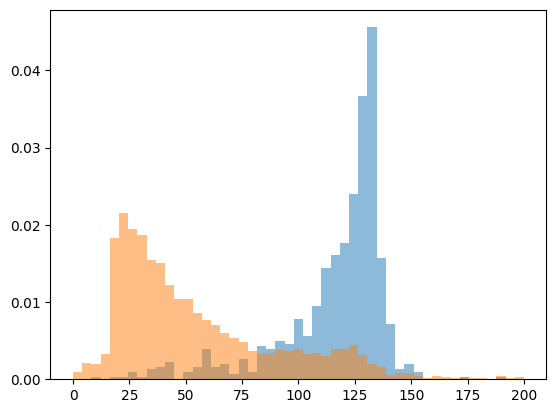

In [28]:
bins=np.linspace(0,200,50)
plt.hist(data[data.label=="spam"]['length'],bins,alpha=.5,density=True,label="spam")
plt.hist(data[data.label=="ham"]['length'],bins,alpha=.5,density=True,label="ham")
plt.show()